# NLTK Chapter 8

## Analyzing Sentence Structure

*The html version of this chapter in the book is available [here](https://www.nltk.org/book/ch08.html "ch08").*

### 1   Some Grammatical Dilemmas

#### 1.1   Linguistic Data and Unlimited Possibilities

*__No notes.__*

#### 1.2 Ubiquitous Ambiguity

A well-known ambiguous sentence from Groucho Marx:

"While hunting in Africa, I shot an elephant in my pajamas. How he got into my pajamas, I don't know."

*Defining a simple grammar for this sentence:*


In [2]:
import nltk

groucho_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")

The grammar allows us to analyze the sentences in two ways:

In [3]:
sent = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
parser = nltk.ChartParser(groucho_grammar)
for tree in parser.parse(sent):
    print(tree)

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


*The trees for these parses:*

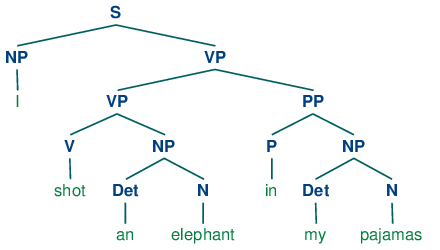

In [4]:
from IPython.display import display, Image

display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\ch08-tree-1.png"))

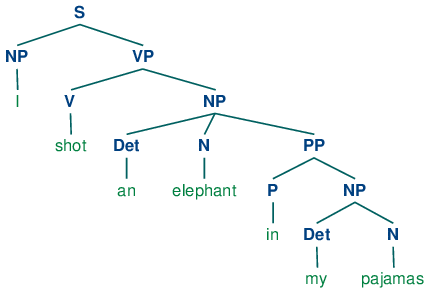

In [5]:
display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\ch08-tree-2.png"))

__Your Turn:__ Consider the following sentences and see if you can think of two quite different interpretations: *Fighting animals could be dangerous. Visiting relatives can be tiresome.* Is ambiguity of the individual words to blame? If not, what is the cause of the ambiguity?

The two different interpretations for the first sentence are:

* 1. Animals that fight might be vicious.

* 2. It might be risky to fight animals.

The interpretations for the second sentence are similar:

* 1. Relatives that visit may be annoying.

* 2. It may be annoying to vist relatives.

It's not the ambiguity of the words; rather, the ambiguity of the structure.  Verbs ending in *-ing* could be (among other things) present participle adjectives or gerunds, which would act as nouns.

### 2 What's the Use of Syntax?

#### 2.1   Beyond n-grams



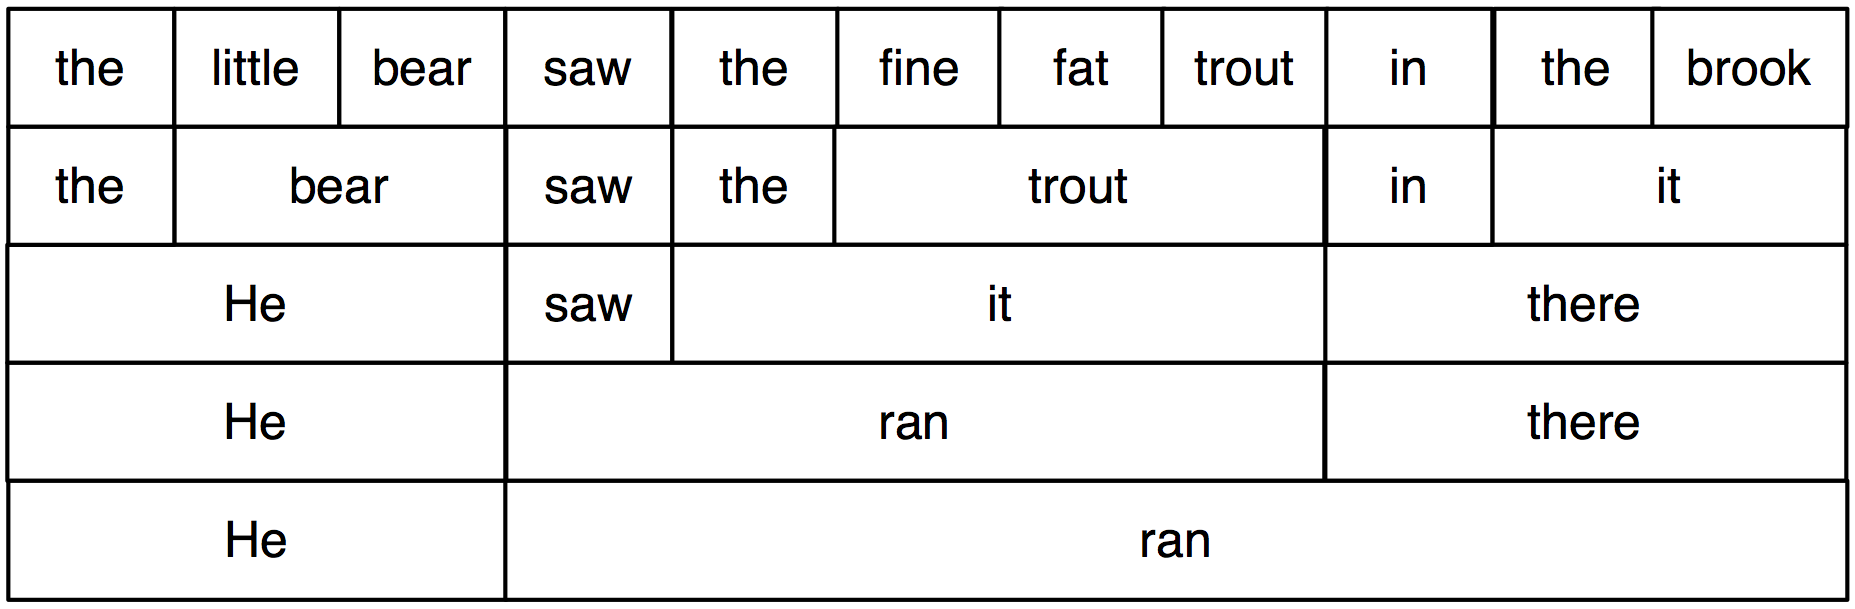

In [6]:
display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\ic_diagram.png"))

*__Figure 2.1:__ Substitution of Word Sequences: working from the top row, we can replace particular sequences of words (e.g. the brook) with individual words (e.g. it); repeating this process we arrive at a grammatical two-word sentence.*

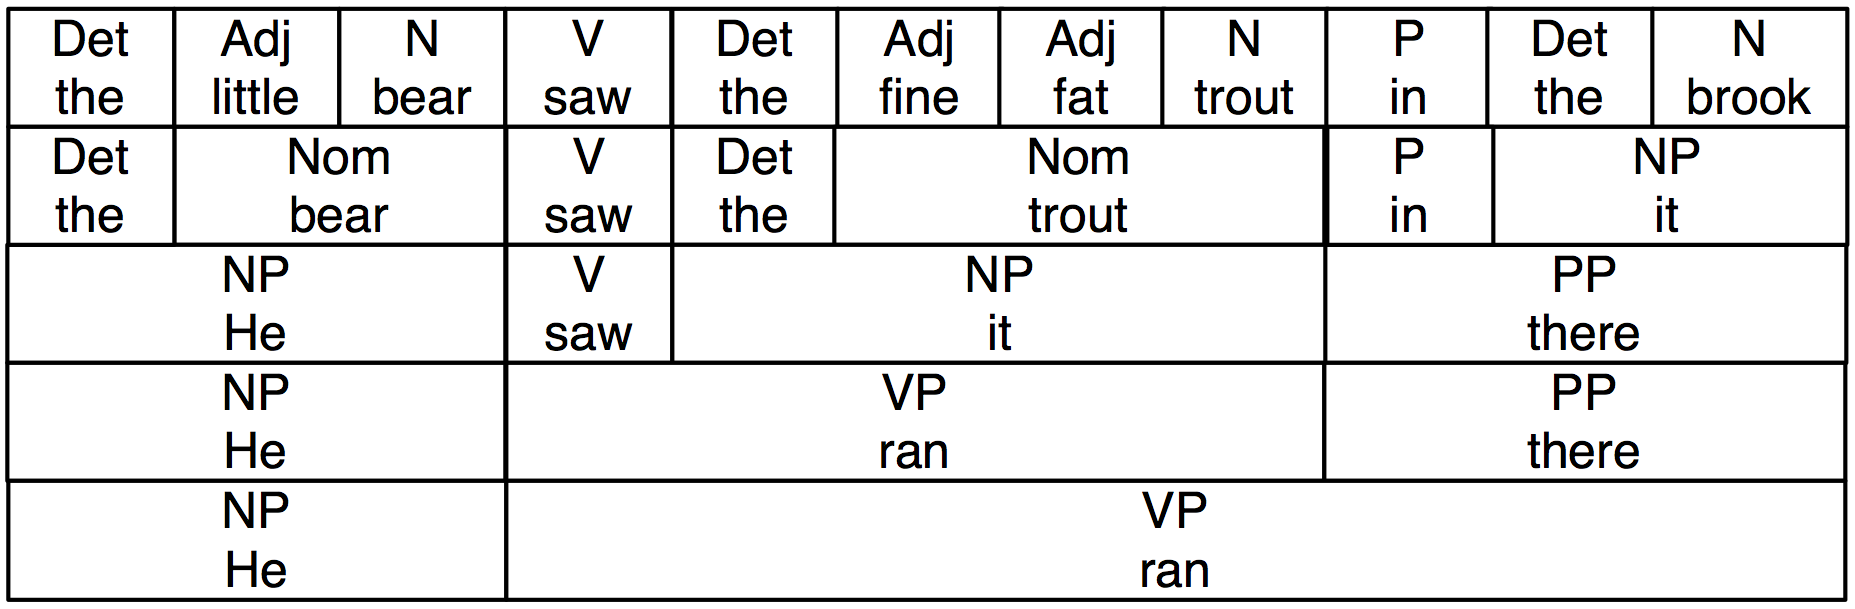

In [7]:
display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\ic_diagram_labeled.png"))

*__Figure 2.2:__ Substitution of Word Sequences Plus Grammatical Categories: This diagram reproduces 2.1 along with grammatical categories corresponding to noun phrases (NP), verb phrases (VP), prepositional phrases (PP), and nominals (Nom).*

If we now strip out the words apart from the topmost row, add an S node, and flip the figure over, we end up with a standard phrase structure tree, shown below. Each node in this tree (including the words) is called a __constituent__. The __immediate constituents__ of `S` are `NP` and `VP`.

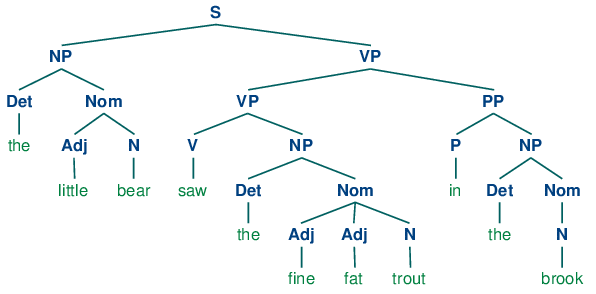

In [8]:
display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\ch08-tree-3.png"))

### 3 Context Free Grammar

#### 3.1   A Simple Grammar

The left-hand side of the first production is the __start-symbol__ of the grammar, and all well-formed trees must have this symbol as their root label.

*Here's a simple Context-Free Grammar:*

In [9]:
grammar1 = nltk.CFG.fromstring("""
S -> NP VP
VP -> V NP | V NP PP
PP -> P NP
V -> "saw" | "ate" | "walked"
NP -> "John" | "Mary" | "Bob" | Det N | Det N PP
Det -> "a" | "an" | "the" | "my"
N -> "man" | "dog" | "cat" | "telescope" | "park"
P -> "in" | "on" | "by" | "with"
""")

In [10]:
sent = "Mary saw Bob".split()
rd_parser = nltk.RecursiveDescentParser(grammar1)
for tree in rd_parser.parse(sent):
    print(tree)

(S (NP Mary) (VP (V saw) (NP Bob)))


| __Symbol__ | __Meaning__              | __Example__          |
|--------|----------------------|------------------|
| S      | sentence             | *the man walked*   |
| NP     | noun phrase          | *a dog*  |
| VP     | verb phrase          | *saw a park* |
| PP     | prepositional phrase | *with a telescope*|
| Det    | determiner           | *the* |
| N      | noun                 | *dog* |
| V      | verb                 | *walked* |
| P      | preposition          | *in* |

__Your Turn:__ Try developing a simple grammar of your own, using the recursive descent parser application, `nltk.app.rdparser()`. It comes already loaded with a sample grammar, but you can edit this as you please (using the `Edit` menu). Change the grammar, and the sentence to be parsed, and run the parser using the autostep button.

*The application opens in a new window, so I won't be calling it from inside a notebook window.  Just FYI, the parser goes through all possible parses, and takes a while to run before it finds the correct one.*

```
nltk.app.rdparser()

[('under',)]
[('with',)]
[('in',)]
[('under',), ('with',)]
[('ate',)]
[('saw',)]
[('dog',)]
[('telescope',)]
[('park',)]
[('dog',), ('telescope',)]
[('man',)]
[('park',), ('dog',), ('telescope',)]
[('the',)]
[('a',)]
[(V, NP)]
[(V,)]
[(V, NP, PP)]
[(V, NP), (V,)]
[(Det, N, PP)]
[(Det, N)]
S [(NP, VP)]
NP [(Det, N, PP), (Det, N)]
VP [(V, NP, PP), (V, NP), (V,)]
PP [(P, NP)]
NP [('I',)]
Det [('the',), ('a',)]
N [('man',), ('park',), ('dog',), ('telescope',)]
V [('ate',), ('saw',)]
P [('in',), ('under',), ('with',)]

```

#### 3.2   Writing Your Own Grammars

You can write and edit grammars in a text file. The file needs the suffix `.cfg`. The file can be loaded into NLTK as follows:

In [13]:
import os

path = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk"

os.chdir(path)

In [14]:
grammar1 = nltk.data.load('file:mygrammar.cfg')
sent = "Mary saw Bob".split()
rd_parser = nltk.RecursiveDescentParser(grammar1)
for tree in rd_parser.parse(sent):
    print(tree)

(S (NP Mary) (VP (V saw) (NP Bob)))


If `print(tree)` produces no output, it's probably because `sent` is not admitted by the grammar.  You can call the parser with tracing set to be with `rd_parser = nltk.RecursiveDescentParser(grammar1, trace = 2)`.

#### 3.3 Recursion in Syntactic Structure

Grammars are __recursive__ if a category on the left hand side of production also appears on the right (e.g., `Nom -> Adj Nom | N`).  Indirect recursion is a combination of two productiosn (e.g. `S -> NP VP` and `VP -> V S`).


In [17]:
grammar2 = nltk.CFG.fromstring("""
S -> NP VP
NP -> Det Nom | PropN
Nom -> Adj Nom | N
VP -> V Adj | V NP | V S | V NP PP
PP -> P NP
PropN -> 'Buster' | 'Chatterer' | 'Joe'
Det -> 'the' | 'a'
N -> 'bear' | 'squirrel' | 'tree' | 'fish' | 'log'
Adj -> 'angry' | 'frightened' | 'little' | 'tall'
V -> 'chased'| 'saw' | 'said' | 'thought' | 'was' | 'put'
P -> 'on'
""")

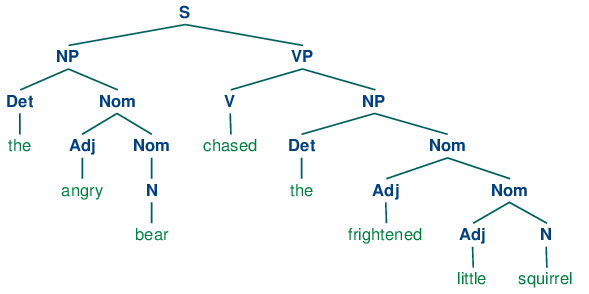

In [19]:
display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\ch08-tree-6.png"))

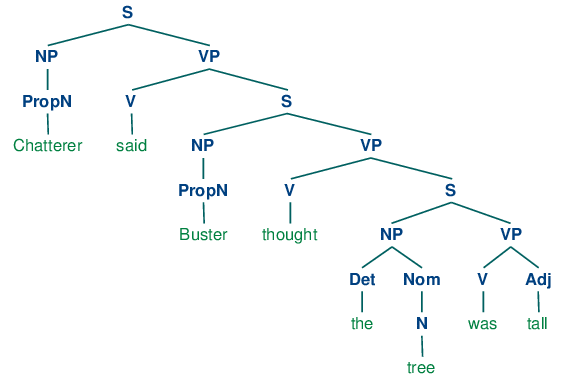

In [20]:
display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\ch08-tree-7.png"))

### 4   Parsing With Context Free Grammar

#### 4.1   Recursive Descent Parsing

The parser will replace goals with subgoals, which will in turn be replaced by sub- sub-goals, and so on until a parse is found or all possibilities are exhausted.



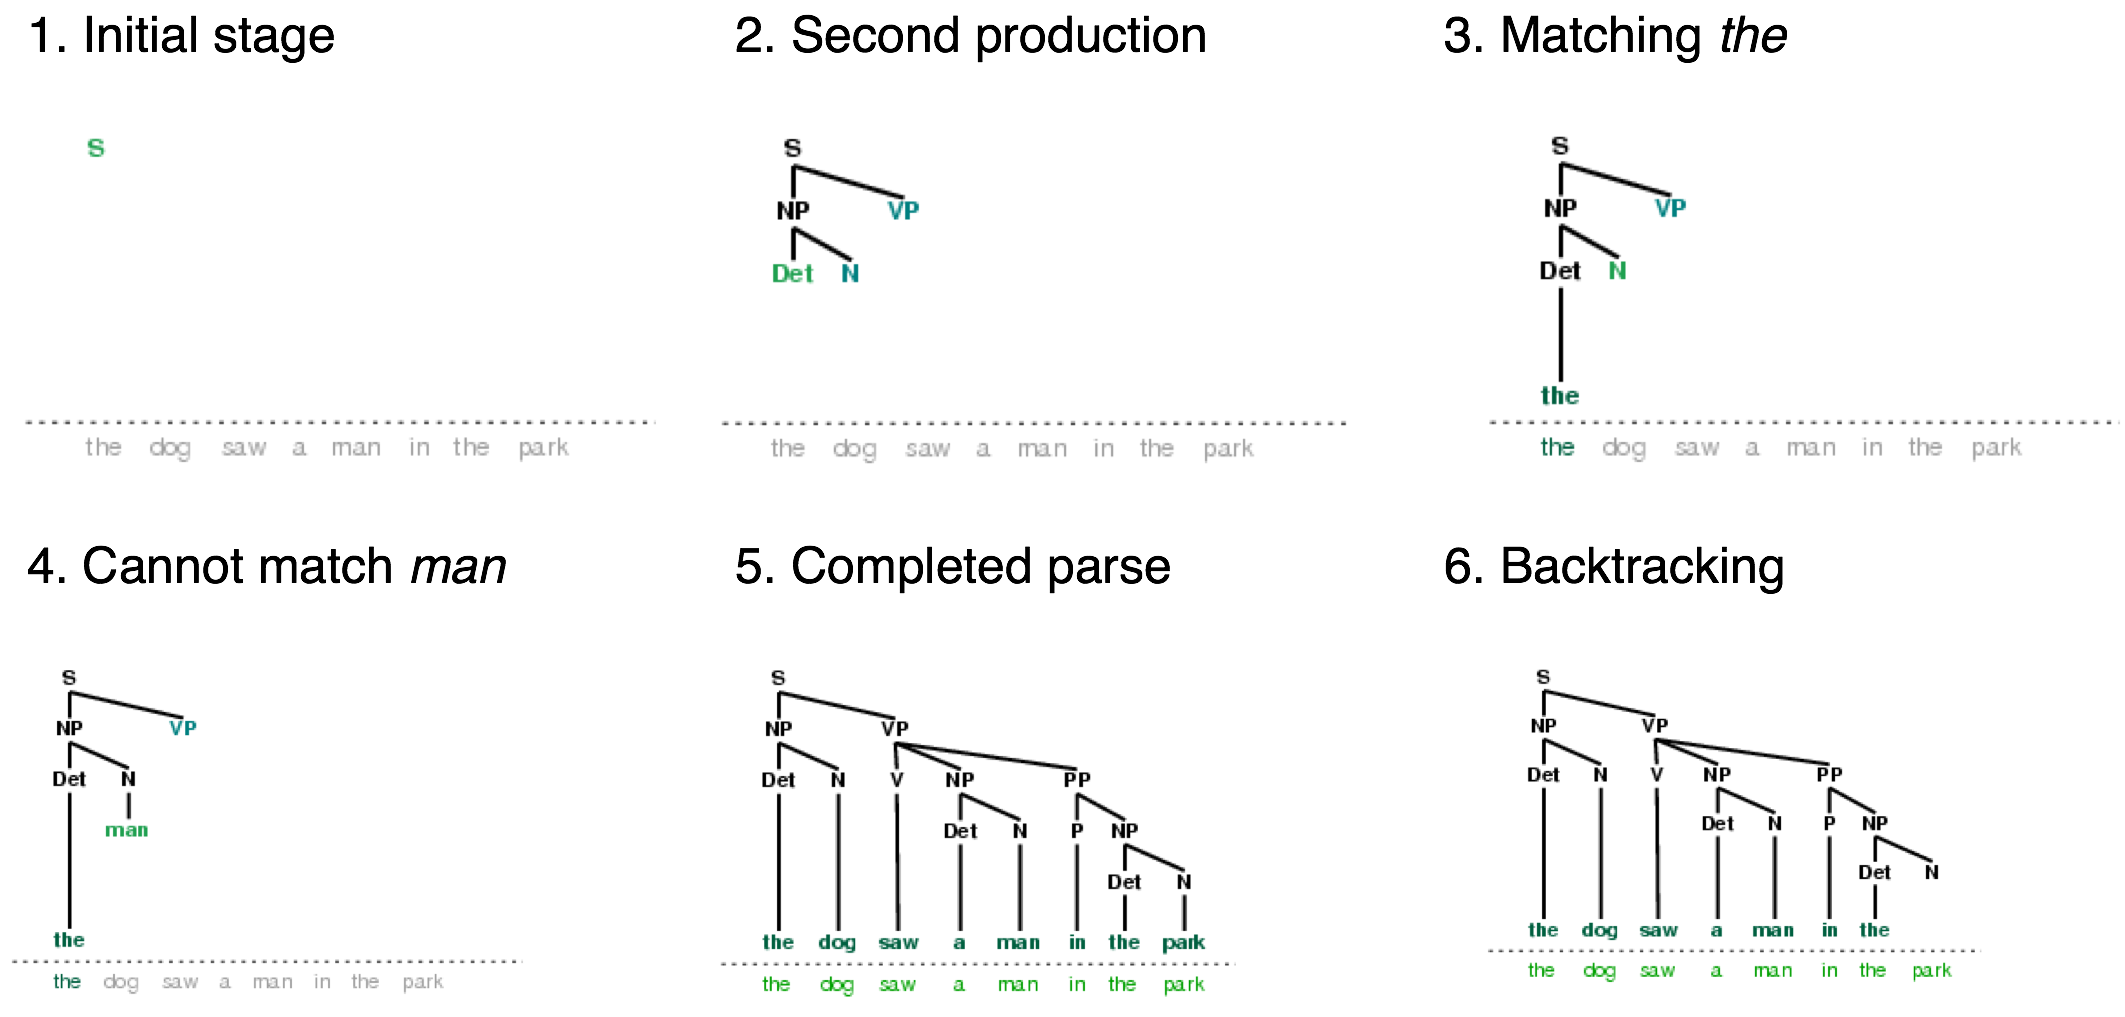

In [21]:
display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\rdparser1-6.png"))

*__Figure 4.1__: Six Stages of a Recursive Descent Parser: the parser begins with a tree consisting of the node S; at each stage it consults the grammar to find a production that can be used to enlarge the tree; when a lexical production is encountered, its word is compared against the input; after a complete parse has been found, the parser backtracks to look for more parses.*

In [23]:
sent = "the dog saw a man in the park".split()
for tree in rd_parser.parse(sent):
    print(tree)

(S
  (NP (Det the) (N dog))
  (VP
    (V saw)
    (NP (Det a) (N man) (PP (P in) (NP (Det the) (N park))))))
(S
  (NP (Det the) (N dog))
  (VP
    (V saw)
    (NP (Det a) (N man))
    (PP (P in) (NP (Det the) (N park)))))


*Adding the parameter `trace` to `RecursiveDescentParser()` will make the parser report the steps that it takes as it parses a text.*

In [26]:
rd_parser = nltk.RecursiveDescentParser(grammar1, trace = 1)
sent = "the dog saw a man in the park".split()
for tree in rd_parser.parse(sent):
    print(tree)

Parsing 'the dog saw a man in the park'
Found a parse:
(S
  (NP (Det the) (N dog))
  (VP
    (V saw)
    (NP (Det a) (N man) (PP (P in) (NP (Det the) (N park))))))
(S
  (NP (Det the) (N dog))
  (VP
    (V saw)
    (NP (Det a) (N man) (PP (P in) (NP (Det the) (N park))))))
Found a parse:
(S
  (NP (Det the) (N dog))
  (VP
    (V saw)
    (NP (Det a) (N man))
    (PP (P in) (NP (Det the) (N park)))))
(S
  (NP (Det the) (N dog))
  (VP
    (V saw)
    (NP (Det a) (N man))
    (PP (P in) (NP (Det the) (N park)))))


In [25]:
rd_parser = nltk.RecursiveDescentParser(grammar1, trace = 2)
sent = "the dog saw a man in the park".split()
for tree in rd_parser.parse(sent):
    print(tree)

Parsing 'the dog saw a man in the park'
    [ * S ]
  E [ * NP VP ]
  E [ * 'John' VP ]
  E [ * 'Mary' VP ]
  E [ * 'Bob' VP ]
  E [ * Det N VP ]
  E [ * 'a' N VP ]
  E [ * 'an' N VP ]
  E [ * 'the' N VP ]
  M [ 'the' * N VP ]
  E [ 'the' * 'man' VP ]
  E [ 'the' * 'dog' VP ]
  M [ 'the' 'dog' * VP ]
  E [ 'the' 'dog' * V NP ]
  E [ 'the' 'dog' * 'saw' NP ]
  M [ 'the' 'dog' 'saw' * NP ]
  E [ 'the' 'dog' 'saw' * 'John' ]
  E [ 'the' 'dog' 'saw' * 'Mary' ]
  E [ 'the' 'dog' 'saw' * 'Bob' ]
  E [ 'the' 'dog' 'saw' * Det N ]
  E [ 'the' 'dog' 'saw' * 'a' N ]
  M [ 'the' 'dog' 'saw' 'a' * N ]
  E [ 'the' 'dog' 'saw' 'a' * 'man' ]
  M [ 'the' 'dog' 'saw' 'a' 'man' ]
  E [ 'the' 'dog' 'saw' 'a' * 'dog' ]
  E [ 'the' 'dog' 'saw' 'a' * 'cat' ]
  E [ 'the' 'dog' 'saw' 'a' * 'telescope' ]
  E [ 'the' 'dog' 'saw' 'a' * 'park' ]
  E [ 'the' 'dog' 'saw' * 'an' N ]
  E [ 'the' 'dog' 'saw' * 'the' N ]
  E [ 'the' 'dog' 'saw' * 'my' N ]
  E [ 'the' 'dog' 'saw' * Det N PP ]
  E [ 'the' 'dog' 'saw' * '

In [27]:
rd_parser = nltk.RecursiveDescentParser(grammar1, trace = 3)
sent = "the dog saw a man in the park".split()
for tree in rd_parser.parse(sent):
    print(tree)

Parsing 'the dog saw a man in the park'
Start:
    [ * S ]
Expand: S -> NP VP
    [ * NP VP ]
Expand: NP -> 'John'
    [ * 'John' VP ]
Backtrack: 'the' match failed
Expand: NP -> 'Mary'
    [ * 'Mary' VP ]
Backtrack: 'the' match failed
Expand: NP -> 'Bob'
    [ * 'Bob' VP ]
Backtrack: 'the' match failed
Expand: NP -> Det N
    [ * Det N VP ]
Expand: Det -> 'a'
    [ * 'a' N VP ]
Backtrack: 'the' match failed
Expand: Det -> 'an'
    [ * 'an' N VP ]
Backtrack: 'the' match failed
Expand: Det -> 'the'
    [ * 'the' N VP ]
Match: 'the'
    [ 'the' * N VP ]
Expand: N -> 'man'
    [ 'the' * 'man' VP ]
Backtrack: 'dog' match failed
Expand: N -> 'dog'
    [ 'the' * 'dog' VP ]
Match: 'dog'
    [ 'the' 'dog' * VP ]
Expand: VP -> V NP
    [ 'the' 'dog' * V NP ]
Expand: V -> 'saw'
    [ 'the' 'dog' * 'saw' NP ]
Match: 'saw'
    [ 'the' 'dog' 'saw' * NP ]
Expand: NP -> 'John'
    [ 'the' 'dog' 'saw' * 'John' ]
Backtrack: 'a' match failed
Expand: NP -> 'Mary'
    [ 'the' 'dog' 'saw' * 'Mary' ]
Backtr

*The example above is a kind of __top-down parsing__, which is very slow: it will spend a lot of time considering words and structures that do not correspond to the input sentence, and it will also discard parsed constituents that will need to be rebuilt again later.  Left-recursive productions (e.g., `NP -> NP PP`) will send the the parser into an infinite loop.*

#### 4.2 Shift-Reduce Parsing

A __shift-reduce__ parser tries to find sequences of words and phrases that correspond to the *right hand* side of grammar and replace them with the left-hand side until the whole sentence is reduced to an `S`. 

This parser repeatedly pushes the next input word onto a stack (i.e., the __shift__ operation).  If the top $n$ items on the stack match the $n$ items on the right hand side of some production, they are all popped off the stack, and the item on the left-hand side of the production is pushed on the stack (i.e., the __reduce__ operation).





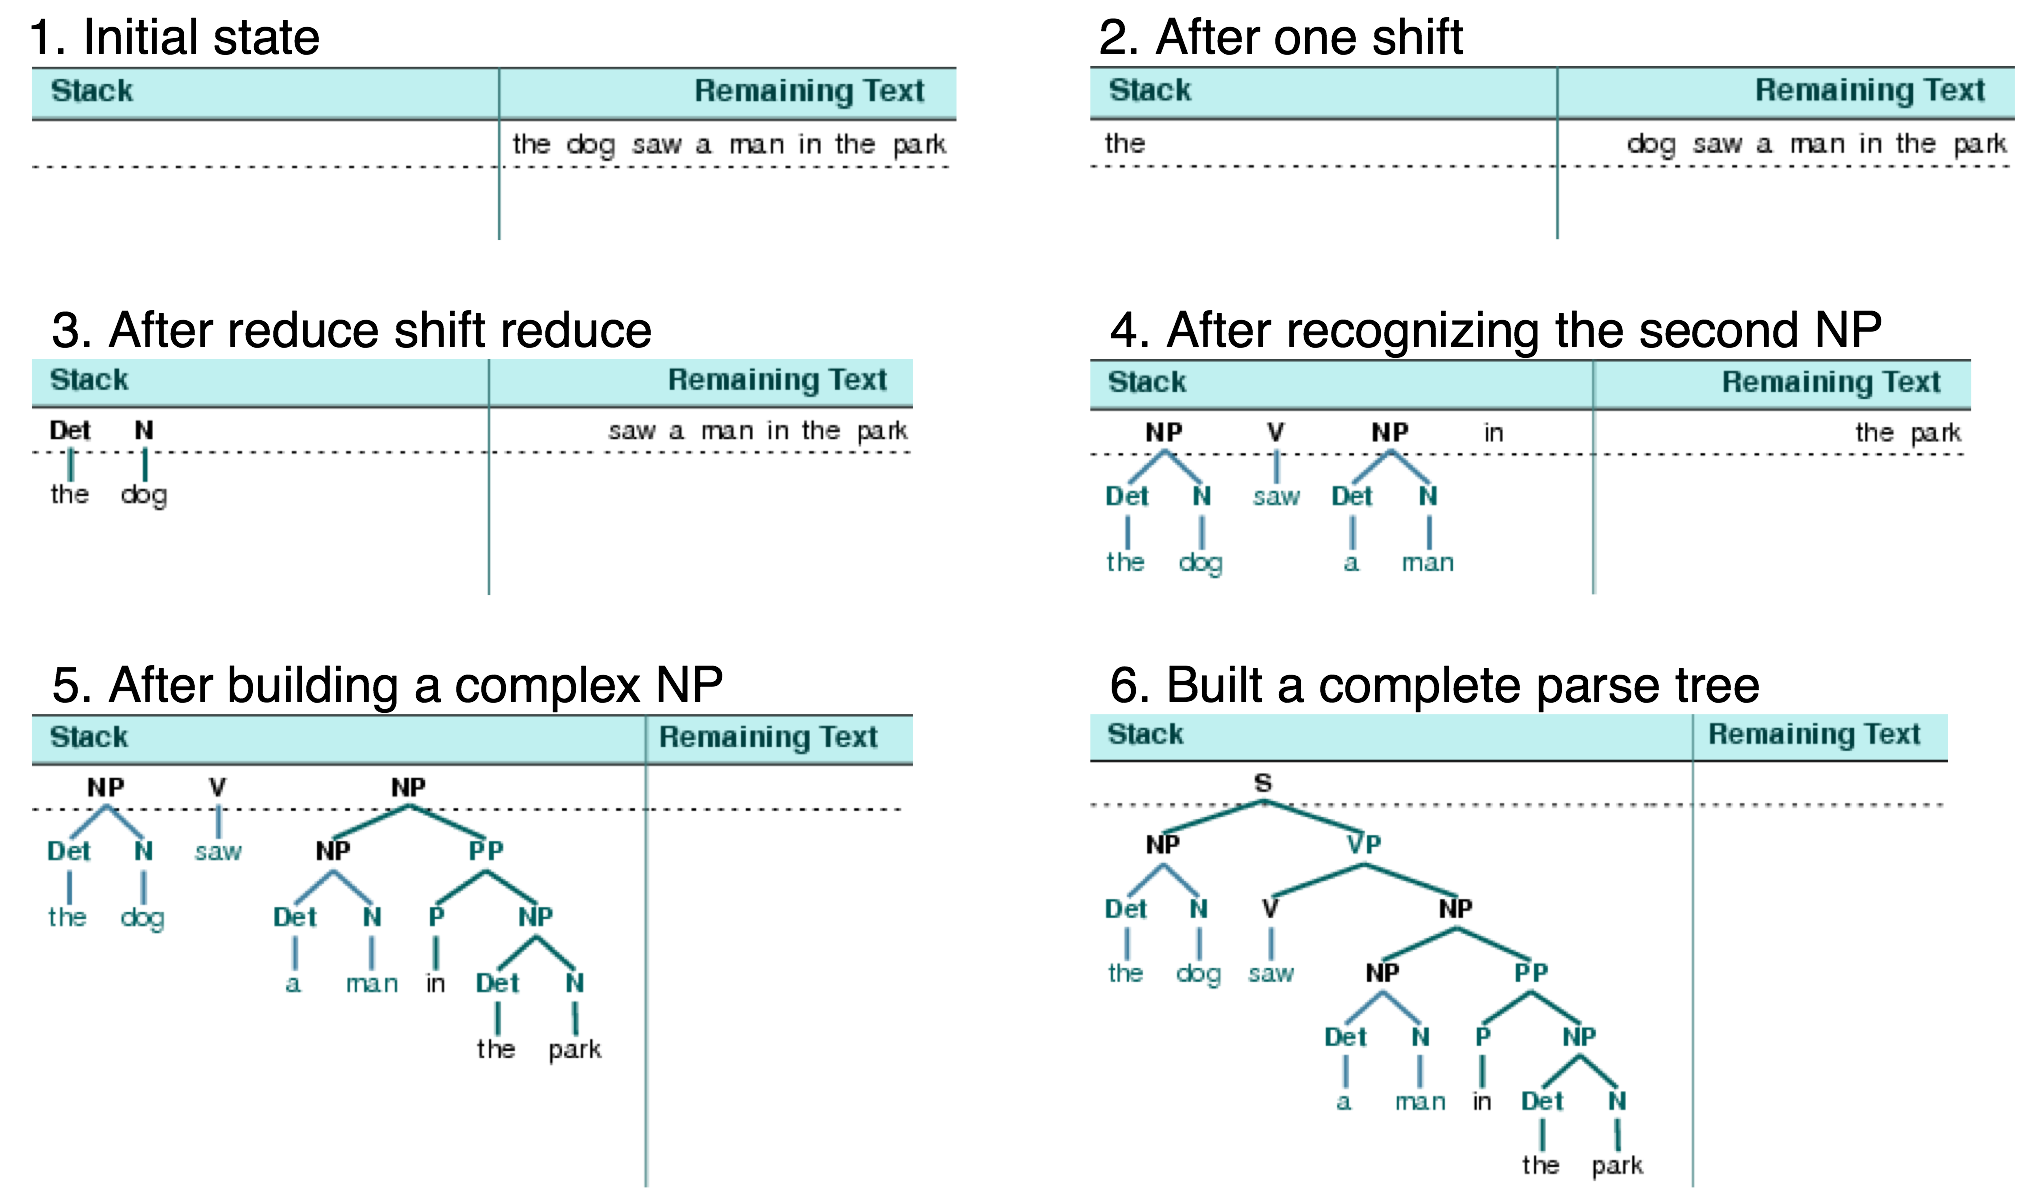

In [29]:
display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\srparser1-6.png"))

*__Figure 4.2:__ Six Stages of a Shift-Reduce Parser: the parser begins by shifting the first input word onto its stack; once the top items on the stack match the right hand side of a grammar production, they can be replaced with the left hand side of that production; the parser succeeds once all input is consumed and one `S` item remains on the stack.*

The `ShiftReduceParser()` in NLTK does not implement any backtracking, so it is not guaranteed to find a parse for a text, even if one exists.  It will also only find at most one parse.  A `trace` parameter controls how verbosely the parser reports the steps:

In [30]:
sr_parser = nltk.ShiftReduceParser(grammar1)
sent = 'Mary saw a dog'.split()
for tree in sr_parser.parse(sent):
    print(tree)

(S (NP Mary) (VP (V saw) (NP (Det a) (N dog))))


__Your Turn:__ Run the above parser in tracing mode to see the sequence of shift and reduce operations, using `sr_parse = nltk.ShiftReduceParser(grammar1, trace=2)`

In [31]:
sr_parser = nltk.ShiftReduceParser(grammar1, trace = 2)
sent = 'Mary saw a dog'.split()
for tree in sr_parser.parse(sent):
    print(tree)

Parsing 'Mary saw a dog'
    [ * Mary saw a dog]
  S [ 'Mary' * saw a dog]
  R [ NP * saw a dog]
  S [ NP 'saw' * a dog]
  R [ NP V * a dog]
  S [ NP V 'a' * dog]
  R [ NP V Det * dog]
  S [ NP V Det 'dog' * ]
  R [ NP V Det N * ]
  R [ NP V NP * ]
  R [ NP VP * ]
  R [ S * ]
(S (NP Mary) (VP (V saw) (NP (Det a) (N dog))))


Shift-reduce parsers can reach a dead end and fail to find a parse, even if the input sentence was well-formed according to the grammar.  This is because of earlier choices which cannot be undone. 

An SR parser can be extended to implement policies to resolve such conflicts.

SR parsers have advantages over RD parsers in that they only build structure that corresponds to the words in the input, and they only build each sub-structure once.

#### 4.3 The Left-Corner Parser

A __left-corner parser__ is a top-down parser with bottom-up filtering which cannot get trapped in left recursive productions.  A left-corner parser preprocesses the CFG to build a table where each row contains two cells: the first holds a non-terminal, and the second a collection of possible left corners of that non-terminal.  

Each time a production is considered by the parser, it checks that the next input word is compatible with at least one of the pre-terminal categories in the left-corner table.

#### 4.4 Well-Formed Substring Tables

__Chart parsing__ uses dynamic programming to implement more efficient parsers.  Phrases are saved as __well-formed substring tables__ (WFST).  In a WFST, the position of words are recorded by filling in cells in a triangular matrix: the vertical axis will denote the start position of a substring, while the horizontal axis will denote the end position.  So, *shot* will appear in the cell with coordinates (1, 2).

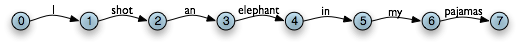

In [32]:
display(Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\chart_positions1.png"))

For every word in `text` we can look up in our grammar what category it belongs to:

In [33]:
text = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
groucho_grammar.productions(rhs = text[1])

[V -> 'shot']

We'll create an $(n-1) \times (n-1)$ matrix for the WFST, and initialize it with the lexical categores of each token in the `init_wfst()` function below.

In [35]:
def init_wfst(tokens, grammar):
    numtokens = len(tokens)
    wfst = [[None for i in range(numtokens + 1)] for j in range(numtokens + 1)]
    for i in range(numtokens):
        productions = grammar.productions(rhs = tokens[i])
        wfst[i][i + 1] = productions[0].lhs()
    return wfst

def complex_wfst(wfst, tokens, grammar, trace = False):
    index = dict( (p.rhs(), p.lhs()) for p in grammar.productions())
    numtokens = len(tokens)
    for span in range(2, numtokens + 1):
        for start in range(numtokens + 1 - span):
            end = start + span
            for mid in range(start + 1, end):
                nt1, nt2 = wfst[start][mid], wfst[mid][end]
                if nt1 and nt2 and (nt1, nt2) in index:
                    wfst[start][end] = index[(nt1, nt2)]
                    if trace:
                        print("[%s] %3s [%s] %3s [%s] ==> [%s] %3s [%s]" % \
                             (start, nt1, mid, nt2, end, start, index[(nt1, nt2)], end))
    return wfst

def display(wfst, tokens):
    print('\nWFST' + ' '.join( ("%-4d" % i) for i in range(1, len(wfst))))
    for i in range(len(wfst) - 1):
        print("%d   " % i, end = " ")
        for j in range(1, len(wfst)):
            print("%-4s" % (wfst[i][j] or '.'), end = " ")
        print()

In [36]:
tokens = "I shot an elephant in my pajamas".split()
wfst0 = init_wfst(tokens, groucho_grammar)
display(wfst0, tokens)


WFST1    2    3    4    5    6    7   
0    NP   .    .    .    .    .    .    
1    .    V    .    .    .    .    .    
2    .    .    Det  .    .    .    .    
3    .    .    .    N    .    .    .    
4    .    .    .    .    P    .    .    
5    .    .    .    .    .    Det  .    
6    .    .    .    .    .    .    N    


In [37]:
wfst1 = complex_wfst(wfst0, tokens, groucho_grammar)
display(wfst1, tokens)


WFST1    2    3    4    5    6    7   
0    NP   .    .    S    .    .    S    
1    .    V    .    VP   .    .    VP   
2    .    .    Det  NP   .    .    .    
3    .    .    .    N    .    .    .    
4    .    .    .    .    P    .    PP   
5    .    .    .    .    .    Det  NP   
6    .    .    .    .    .    .    N    


If we set `trace` to `True` we can see the WFST being constructed:

In [38]:
wfst1 = complex_wfst(wfst0, tokens, groucho_grammar, trace = True)

[2] Det [3]   N [4] ==> [2]  NP [4]
[5] Det [6]   N [7] ==> [5]  NP [7]
[1]   V [2]  NP [4] ==> [1]  VP [4]
[4]   P [5]  NP [7] ==> [4]  PP [7]
[0]  NP [1]  VP [4] ==> [0]   S [4]
[1]  VP [4]  PP [7] ==> [1]  VP [7]
[0]  NP [1]  VP [7] ==> [0]   S [7]


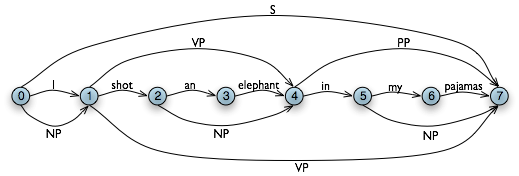

In [41]:
Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\chart_positions2.png")

*__Figure 4.5:__ The Chart Data Structure: non-terminals are represented as extra edges in the chart.*

WFST's require every non-lexical grammar production to be binary.  

__Your Turn:__ Try out the interactive chart parser application `nltk.app.chartparser()`.

The application opens in a new window, so I won't be running it from this notebook.

### 5   Dependencies and Dependency Grammar

__Phrase structure grammar__ concerns how words and sequences combine to form constituents.  __Dependency grammar__ focuses on how words relate to other words.  Dependency is a binary asymmetric relation that holds between a __head__ and its __dependents__.  The head of a sentence is usually the tensed verb, and every other word is either dependent on the sentence head or connects to it through a path of dependencies.



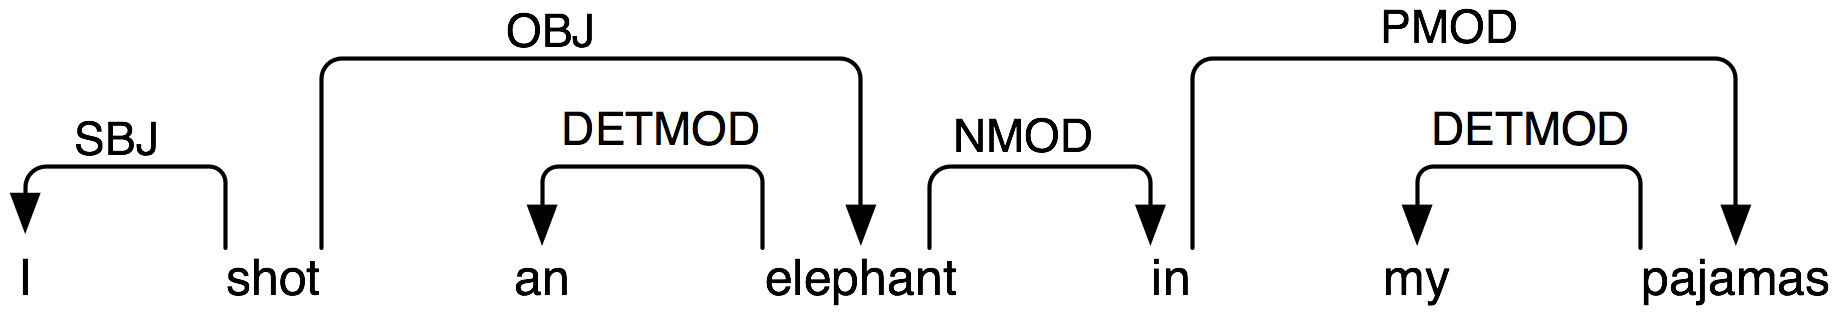

In [43]:
Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\depgraph0.png")

*__Figure 5.1__: Dependency Structure: arrows point from heads to their dependents; labels indicate the grammatical function of the dependent as subject, object or modifier. This dependency graph is __projective__.  I.e., when the words are written in linear order, the edges can be drawn above the wrods without crossing.*

This is an example of encoding a dependency grammar in NLTK.  This captures bare dependency information without specifying the type of dependency:



In [44]:
groucho_dep_grammar = nltk.DependencyGrammar.fromstring("""
    'shot' -> 'I' | 'elephant' | 'in'
    'elephant' -> 'an' | 'in'
    'in' -> 'pajamas'
    'pajamas' -> 'my'
    """)

In [45]:
print(groucho_dep_grammar)

Dependency grammar with 7 productions
  'shot' -> 'I'
  'shot' -> 'elephant'
  'shot' -> 'in'
  'elephant' -> 'an'
  'elephant' -> 'in'
  'in' -> 'pajamas'
  'pajamas' -> 'my'


Here's an alternative approach to capturing the attachment ambiguity:

In [46]:
pdp = nltk.ProjectiveDependencyParser(groucho_dep_grammar)
sent = 'I shot an elephant in my pajamas'.split()
trees = pdp.parse(sent)
for tree in trees:
    print(tree)

(shot I (elephant an (in (pajamas my))))
(shot I (elephant an) (in (pajamas my)))


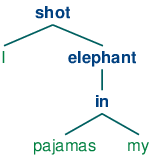

In [47]:
Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\ch08-tree-10.png")

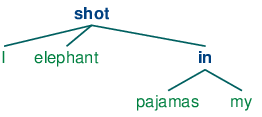

In [48]:
Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\ch08-tree-11.png")

#### 5.1   Valency and the Lexicon

Some parts of speech (e.g., verbs) have valenices which restrict which __complements__ they can take.  E.g., transitive verbs need an object, whereas intransitive ones can't take one.  We could further constrain a grammar by specifying the valencies of its parts of speech, e.g.

```
VP -> TV NP
TV -> 'chased' | 'saw'
```

#### 5.2 Scaling Up

It is very difficult to scale up grammars like those considered in this chapter so that they can be applied to whole languages, but some people have tried.

### 6 Grammar Development

#### 6.1 Treebanks and Grammars

`corpus` defines the `treebank` corpus reader, which contains a 10% sample of the Penn Treebank corpus:

In [50]:
from nltk.corpus import treebank
t = treebank.parsed_sents('wsj_0001.mrg')[0]
print(t)

(S
  (NP-SBJ
    (NP (NNP Pierre) (NNP Vinken))
    (, ,)
    (ADJP (NP (CD 61) (NNS years)) (JJ old))
    (, ,))
  (VP
    (MD will)
    (VP
      (VB join)
      (NP (DT the) (NN board))
      (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
      (NP-TMP (NNP Nov.) (CD 29))))
  (. .))


We can use corpora to help develop grammars.  The function below uses a filter to find verbs that take sentential complements (i.e., an entire sentence could appear after the verb).

In [51]:
def filter(tree):
    child_nodes = [child.label() for child in tree
                   if isinstance(child, nltk.Tree)]
    return (tree.label() == 'VP') and ('S' in child_nodes)

In [53]:
from nltk.corpus import treebank
[subtree for tree in treebank.parsed_sents()
         for subtree in tree.subtrees(filter)][:5]

[Tree('VP', [Tree('VBN', ['named']), Tree('S', [Tree('NP-SBJ', [Tree('-NONE-', ['*-1'])]), Tree('NP-PRD', [Tree('NP', [Tree('DT', ['a']), Tree('JJ', ['nonexecutive']), Tree('NN', ['director'])]), Tree('PP', [Tree('IN', ['of']), Tree('NP', [Tree('DT', ['this']), Tree('JJ', ['British']), Tree('JJ', ['industrial']), Tree('NN', ['conglomerate'])])])])])]),
 Tree('VP', [Tree('VBD', ['said']), Tree(',', [',']), Tree('``', ['``']), Tree('S', [Tree('NP-SBJ', [Tree('DT', ['This'])]), Tree('VP', [Tree('VBZ', ['is']), Tree('NP-PRD', [Tree('DT', ['an']), Tree('JJ', ['old']), Tree('NN', ['story'])])])])]),
 Tree('VP', [Tree('VBD', ['said']), Tree('S', [Tree('-NONE-', ['*T*-1'])])]),
 Tree('VP', [Tree('VBN', ['expected']), Tree('S', [Tree('-NONE-', ['*?*'])])]),
 Tree('VP', [Tree('VBD', ['said']), Tree('S', [Tree('-NONE-', ['*T*-1'])])])]

Here is an example from the Prepositional Phrase Attachment Corpus that finds pairs of prepositional phrases where the preposition and noun are fixed, but the choice of verb determines whether the prepositional phrase is attached to the `VP` or `NP`:

In [62]:
from collections import defaultdict
entries = nltk.corpus.ppattach.attachments('training')
table = defaultdict(lambda: defaultdict(set))
for entry in entries:
    key = entry.noun1 + '-' + entry.prep + '-' + entry.noun2
    table[key][entry.attachment].add(entry.verb)

for key in sorted(table):
    if len(table[key]) > 1:
        print(key, 'N:', sorted(table[key]['N']), 'V:', sorted(table[key]['V']))

%-below-level N: ['left'] V: ['be']
%-from-year N: ['was'] V: ['declined', 'dropped', 'fell', 'grew', 'increased', 'plunged', 'rose', 'was']
%-in-August N: ['was'] V: ['climbed', 'fell', 'leaping', 'rising', 'rose']
%-in-September N: ['increased'] V: ['climbed', 'declined', 'dropped', 'edged', 'fell', 'grew', 'plunged', 'rose', 'slipped']
%-in-week N: ['declined'] V: ['was']
%-to-% N: ['add', 'added', 'backed', 'be', 'cut', 'go', 'grow', 'increased', 'increasing', 'is', 'offer', 'plummet', 'reduce', 'rejected', 'rise', 'risen', 'shaved', 'wants', 'yield', 'zapping'] V: ['fell', 'rise', 'slipped']
%-to-million N: ['declining'] V: ['advanced', 'climbed', 'cutting', 'declined', 'declining', 'dived', 'dropped', 'edged', 'fell', 'gained', 'grew', 'increased', 'jump', 'jumped', 'plunged', 'rising', 'rose', 'slid', 'slipped', 'soared', 'tumbled']
1-to-21 N: ['dropped'] V: ['dropped']
1-to-33 N: ['gained'] V: ['dropped', 'fell', 'jumped']
1-to-4 N: ['added'] V: ['gained']
1-to-47 N: ['jumped']

Example from the *Sinica Treebank Corpus*:

*Opens in new window, so not calling it from this notebook:*

```
nltk.corpus.sinica_treebank.parsed_sents()[3450].draw()
```

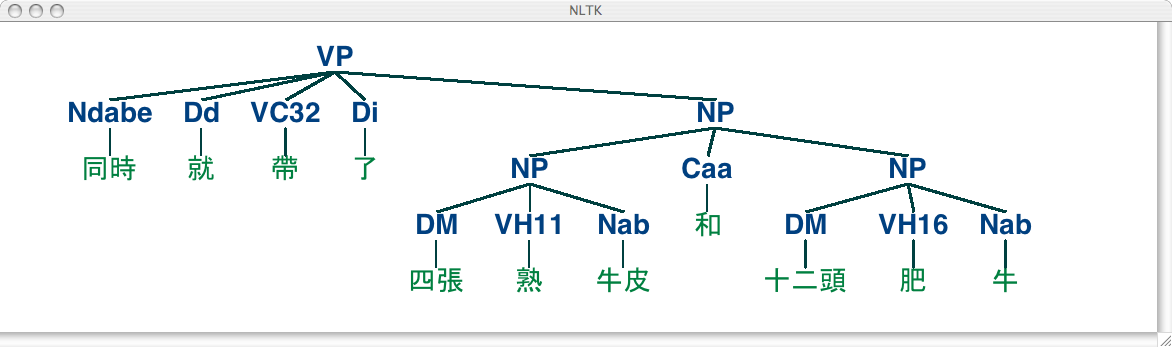

In [64]:
Image(filename = "C:\\Users\\mjcor\\Desktop\\ProgrammingStuff\\nltk\\sinica-tree.png")

#### 6.2 Pernicious Ambiguity

As the coverage of grammar increases and the length of the input sentences grows, the number of parse trees grows rapidly.  E.g., we can expand the sentence *fish fish fish* until it grows to an absure size:*

In [65]:
grammar = nltk.CFG.fromstring("""
S -> NP V NP
NP -> NP Sbar
Sbar -> NP V
NP -> 'fish'
V -> 'fish'
""")

Parsing *fish fish fish fish fish*:

In [66]:
tokens = ["fish"] * 5
cp = nltk.ChartParser(grammar)
for tree in cp.parse(tokens):
    print(tree)

(S (NP fish) (V fish) (NP (NP fish) (Sbar (NP fish) (V fish))))
(S (NP (NP fish) (Sbar (NP fish) (V fish))) (V fish) (NP fish))


*In case it's not clear, think "Fish (that) fish fish (also) fish fish," or "Fish fish fish, (that) fish fish."*

As the length of this sentence goes up (3, 5, 7, ...), the number of parse trees increases so: 1, 2, 5, 14, 42, 132, 429, 1,430, etc...  These are Catalan numbers.  For a sentence of length 50 there would be over 1,000,000,000,000 parses.  No practical NLP system could construct millions of trees for a sentence and choose the appropriate one in the context.

#### 6.3 Weighted Grammar

Using the Penn Treebank sample to examine all instances of prepositional dative and double object constructions involving *give*:

In [67]:
def give(t):
    return t.label() == 'VP' and len(t) > 2 and t[1].label() == 'NP'\
           and (t[2].label() == 'PP-DTV' or t[2].label() == 'NP')\
           and ('give' in t[0].leaves() or 'gave' in t[0].leaves())

def sent(t):
    return ' '.join(token for token in t.leaves() if token[0] not in '*-0')

def print_node(t, width):
    output = "%s %s: %s / %s: %s" %\
        (sent(t[0]), t[1].label(), sent(t[1]), t[2].label(), sent(t[2]))
    if len(output) > width:
        output = output[:width] + '...'
    print(output)
        

In [68]:
for tree in nltk.corpus.treebank.parsed_sents():
    for t in tree.subtrees(give):
        print_node(t, 72)

gave NP: the chefs / NP: a standing ovation
give NP: advertisers / NP: discounts for maintaining or increasing ad sp...
give NP: it / PP-DTV: to the politicians
gave NP: them / NP: similar help
give NP: them / NP: 
give NP: only French history questions / PP-DTV: to students in a Europe...
give NP: federal judges / NP: a raise
give NP: consumers / NP: the straight scoop on the U.S. waste crisis
gave NP: Mitsui / NP: access to a high-tech medical product
give NP: Mitsubishi / NP: a window on the U.S. glass industry
give NP: much thought / PP-DTV: to the rates she was receiving , nor to ...
give NP: your Foster Savings Institution / NP: the gift of hope and free...
give NP: market operators / NP: the authority to suspend trading in futu...
gave NP: quick approval / PP-DTV: to $ 3.18 billion in supplemental appr...
give NP: the Transportation Department / NP: up to 50 days to review any...
give NP: the president / NP: such power
give NP: me / NP: the heebie-jeebies
give NP: holders / NP: 

A __probabilistic context free grammar__ (PCFG) is a CFG that associates a probability with each of its productions.  It generates the same set of parses for a text that the CFG does, and assigns a probability to each.  The probability of a parse is simply the product of the probabilities of its constituent productions.

In [78]:
grammar = nltk.PCFG.fromstring("""
    S    -> NP VP              [1.0]
    VP   -> TV NP              [0.4]
    VP   -> IV                 [0.3]
    VP   -> DatV NP NP         [0.3]
    TV   -> 'saw'              [1.0]
    IV   -> 'ate'              [1.0]
    DatV -> 'gave'             [1.0]
    NP   -> 'telescopes'       [0.8]
    NP   -> 'Jack'             [0.2]
    """)

In [79]:
print(grammar)

Grammar with 9 productions (start state = S)
    S -> NP VP [1.0]
    VP -> TV NP [0.4]
    VP -> IV [0.3]
    VP -> DatV NP NP [0.3]
    TV -> 'saw' [1.0]
    IV -> 'ate' [1.0]
    DatV -> 'gave' [1.0]
    NP -> 'telescopes' [0.8]
    NP -> 'Jack' [0.2]


In [80]:
viterbi_parser = nltk.ViterbiParser(grammar)
for tree in viterbi_parser.parse(['Jack', 'saw', 'telescopes']):
    print(tree)

(S (NP Jack) (VP (TV saw) (NP telescopes))) (p=0.064)


### 7 Summary

*__No notes.__*

### 8 Further Reading

*__No notes.__*

### 9 Exercises 

##### 9.1 

☼ Can you come up with grammatical sentences that have probably never been uttered before? (Take turns with a partner.) What does this tell you about human language?

*I'm not doing this with a partner, but I believe that this here answer to exercise 9.1 in the NLTK book consists of a particular sequence of words that has never, in the entire history of humankind, been written - or for that matter, uttered - before, and would thus qualify as a satisfactory answer to this exercise.*

*Naturally, the longer and more specific a sentence, the less likely that it's ever been uttered.  Simply put, this tells us that human language is capable of infinite variety, and any attempts to come up with a grammar for human language need to take this into account.*

##### 9.2 

☼ Recall Strunk and White's prohibition against sentence-initial *however* used to mean "although". Do a web search for however used at the start of the sentence. How widely used is this construction?

*It's not possible to do a Google search and specify where in the returned sentences a keyword should fall.  In fact, none of the queryable corpora that I have seen offer this functionality.  However, searches of the [Corpus of Contemporary American English](https://www.english-corpora.org/coca/ "coca") will show the results in context, and from skimming this results it is easy to see that "however" is commonly used at the beginning of sentences, and in some very erudite contexts.*

##### 9.3 

☼ Consider the sentence *Kim arrived or Dana left and everyone cheered*. Write down the parenthesized forms to show the relative scope of and and or. Generate tree structures corresponding to both of these interpretations.

(S (S (S (NP (N Kim)) (VP (V arrived))) (CC or) (S (NP (N Dana)) (VP (V left)))) (CC and) (S (NP (N everyone)) (VP (V cheered))))
    

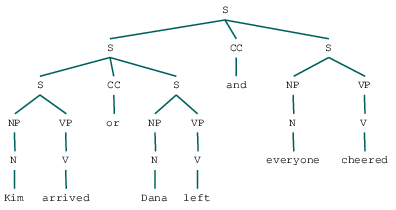

In [85]:
string = "(S (S (S (NP (N Kim)) (VP (V arrived))) (CC or) (S (NP (N Dana)) (VP (V left)))) (CC and) (S (NP (N everyone)) (VP (V cheered))))"
nltk.Tree.fromstring(string)

*Since "Kim arrived", "Dana left" and "everyone cheered" all contain noun and verb phrases, each could be considered a sentence in the grammars from this chapter.  Furthermore, "or" joins the first two sentences into another sentence, since we're not sure which action prompted everyone to cheer.*

##### 9.4 

☼ The `Tree` class implements a variety of other useful methods. See the `Tree` help documentation for more details, i.e. import the Tree class and then type `help(Tree)`.

In [87]:
from nltk import Tree

help(Tree)

Help on class Tree in module nltk.tree:

class Tree(builtins.list)
 |  Tree(node, children=None)
 |  
 |  A Tree represents a hierarchical grouping of leaves and subtrees.
 |  For example, each constituent in a syntax tree is represented by a single Tree.
 |  
 |  A tree's children are encoded as a list of leaves and subtrees,
 |  where a leaf is a basic (non-tree) value; and a subtree is a
 |  nested Tree.
 |  
 |      >>> from nltk.tree import Tree
 |      >>> print(Tree(1, [2, Tree(3, [4]), 5]))
 |      (1 2 (3 4) 5)
 |      >>> vp = Tree('VP', [Tree('V', ['saw']),
 |      ...                  Tree('NP', ['him'])])
 |      >>> s = Tree('S', [Tree('NP', ['I']), vp])
 |      >>> print(s)
 |      (S (NP I) (VP (V saw) (NP him)))
 |      >>> print(s[1])
 |      (VP (V saw) (NP him))
 |      >>> print(s[1,1])
 |      (NP him)
 |      >>> t = Tree.fromstring("(S (NP I) (VP (V saw) (NP him)))")
 |      >>> s == t
 |      True
 |      >>> t[1][1].set_label('X')
 |      >>> t[1][1].label()
 

##### 9.5 

☼ In this exercise you will manually construct some parse trees.

* a. Write code to produce two trees, one for each reading of the phrase *old men and women*

* b. Encode any of the trees presented in this chapter as a labeled bracketing and use `nltk.Tree()` to check that it is well-formed. Now use `draw()` to display the tree.

* c. As in (a) above, draw a tree for *The woman saw a man last Thursday.*

In [106]:
grammar = nltk.CFG.fromstring("""

S -> NP CC NP | JJ NP
NP -> N | JJ N | N CC N
N -> 'men' | 'women'
JJ -> 'old'
CC -> 'and'
""")

In [107]:
sent = ['old', 'men', 'and', 'women']
parser = nltk.ChartParser(grammar)
for tree in parser.parse(sent):
    print(tree)

(S (JJ old) (NP (N men) (CC and) (N women)))
(S (NP (JJ old) (N men)) (CC and) (NP (N women)))


In [112]:
trees = []
for tree in parser.parse(sent):
    trees.append(str(tree))

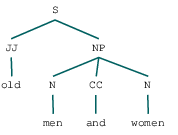

In [117]:
nltk.Tree.fromstring(trees[0])

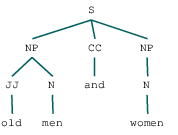

In [118]:
nltk.Tree.fromstring(trees[1])

*It doesn't appear we can draw multiple trees at once.  The following code produces nothing:*

In [119]:
for t in trees:
    nltk.Tree.fromstring(t)

PAUSED at b